## Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

# 1. Exploratory Data Analysis (EDA)

In [56]:
# Reading the first five rows of data as dataframe
diabates_train_df = pd.read_csv('data_train.csv')
diabates_train_df.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0


In [6]:
diabates_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Id                    202944 non-null  int64
 1   HighBP                202944 non-null  int64
 2   HighChol              202944 non-null  int64
 3   CholCheck             202944 non-null  int64
 4   BMI                   202944 non-null  int64
 5   Smoker                202944 non-null  int64
 6   Stroke                202944 non-null  int64
 7   HeartDiseaseorAttack  202944 non-null  int64
 8   PhysActivity          202944 non-null  int64
 9   Fruits                202944 non-null  int64
 10  Veggies               202944 non-null  int64
 11  HvyAlcoholConsump     202944 non-null  int64
 12  AnyHealthcare         202944 non-null  int64
 13  NoDocbcCost           202944 non-null  int64
 14  GenHlth               202944 non-null  int64
 15  MentHlth              202944 non-n

In [7]:
diabates_train_df.isna().sum()

Id                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64

> <span style="font-size:1em;">✔</span> **Observations:** 
> - Dataset has 202944 rows and 25 columns, with no missing values or NaN value.

In [8]:
diabates_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,202944.0,101471.500000,58585.030853,0.0,50735.75,101471.5,152207.25,202943.0
HighBP,202944.0,0.428700,0.494891,0.0,0.00,0.0,1.00,1.0
HighChol,202944.0,0.424344,0.494244,0.0,0.00,0.0,1.00,1.0
CholCheck,202944.0,0.962655,0.189607,0.0,1.00,1.0,1.00,1.0
BMI,202944.0,28.379824,6.612738,12.0,24.00,27.0,31.00,98.0
Smoker,202944.0,0.442634,0.496700,0.0,0.00,0.0,1.00,1.0
Stroke,202944.0,0.040844,0.197929,0.0,0.00,0.0,0.00,1.0
HeartDiseaseorAttack,202944.0,0.094391,0.292372,0.0,0.00,0.0,0.00,1.0
PhysActivity,202944.0,0.756302,0.429313,0.0,1.00,1.0,1.00,1.0
Fruits,202944.0,0.635372,0.481327,0.0,0.00,1.0,1.00,1.0


> <span style="font-size:1em;">✔</span> **Observations:** 
> - Id: range from 0 to 2020944
> - HighBp: categorical type (0 or 1). The mean value suggests that approximately 42.97% of individuals in the dataset have high blood pressure. The standard deviation indicates some variability in the occurrence of high blood pressure among individuals
> - HighChol: Similar to HighBp
> - CholCheck: categorical type (0 or 1). High mean value indicates large amount of people undergone cholesterol check within 5 year
> - BMI: continous type. The mean BMI is 28.37, indicating individuals are overweight.The large standard deviation (6.61) suggests a wide variability in BMI among individuals. Min is 12 and max is 98
> - Smoker: categorical type (0 or 1). The mean value suggests that approximately 44.26% of individuals are smokers.
> - Stroke: categorical type (0 or 1).Low mean value (0.0408) suggests that strokes are relatively uncommon in the dataset.
> - HeartDiseaseorAttack: categorical type (0 or 1).
> - PhysActivity: categorical type (0 or 1). Mean value is 0.75 indicates, most people do exercises frequently
> - Fruits: categorical type (0 or 1). Mean value is 0.63, indicates above average people eat fruit
> - Vegies: categorical type (0 or 1). Mean value is 0.81, indicates most people eat vegetables per day
> - HvyAlcoholConsump: categorical type (0 or 1). The mean value described the small number of people consumes Heavy alcohol 
> - AnyHealthcare: categorical type (0 or 1). The mean illustrate 0.95, indicates high number of people prepaid health insurance
> - NoDocbcCost: categorical type (0 or 1). Mean indicates small amount of people do not see doctor due to the cost
> - GenHlth: categorical type (1: excelent, 2: very good, 3: good, 4: fair, 5: poor). The average general health assessment is around moderate, with slight variability.
> - MentHlth: numerical type (range from 1 to 30). Mental health assessments show considerable variability, with the average being moderate.
> - PhysHlth: numerical type (range from 1 to 30).Physical health assessments exhibit significant variability, with a tendency towards lower ratings on average.
> - DiffWalk: categorical type (0 or 1). Difficulty in walking appears to be relatively uncommon, with little variability observed.
> - Sex: categorical type (0: female, 1:male).The dataset seems to have a slightly higher proportion of males, with a nearly equal distribution between sexes
> - Age: categorical type. 
> - Income: categorical type. The mean indicates people have income less than  35,000 USD
> - ExtraMedTest and ExtraAlcoholTest: These columns likely represent additional medical and alcohol tests, respectively. Negative mean values indicate that, on average, individuals have not undergone these tests, with wide variability observed



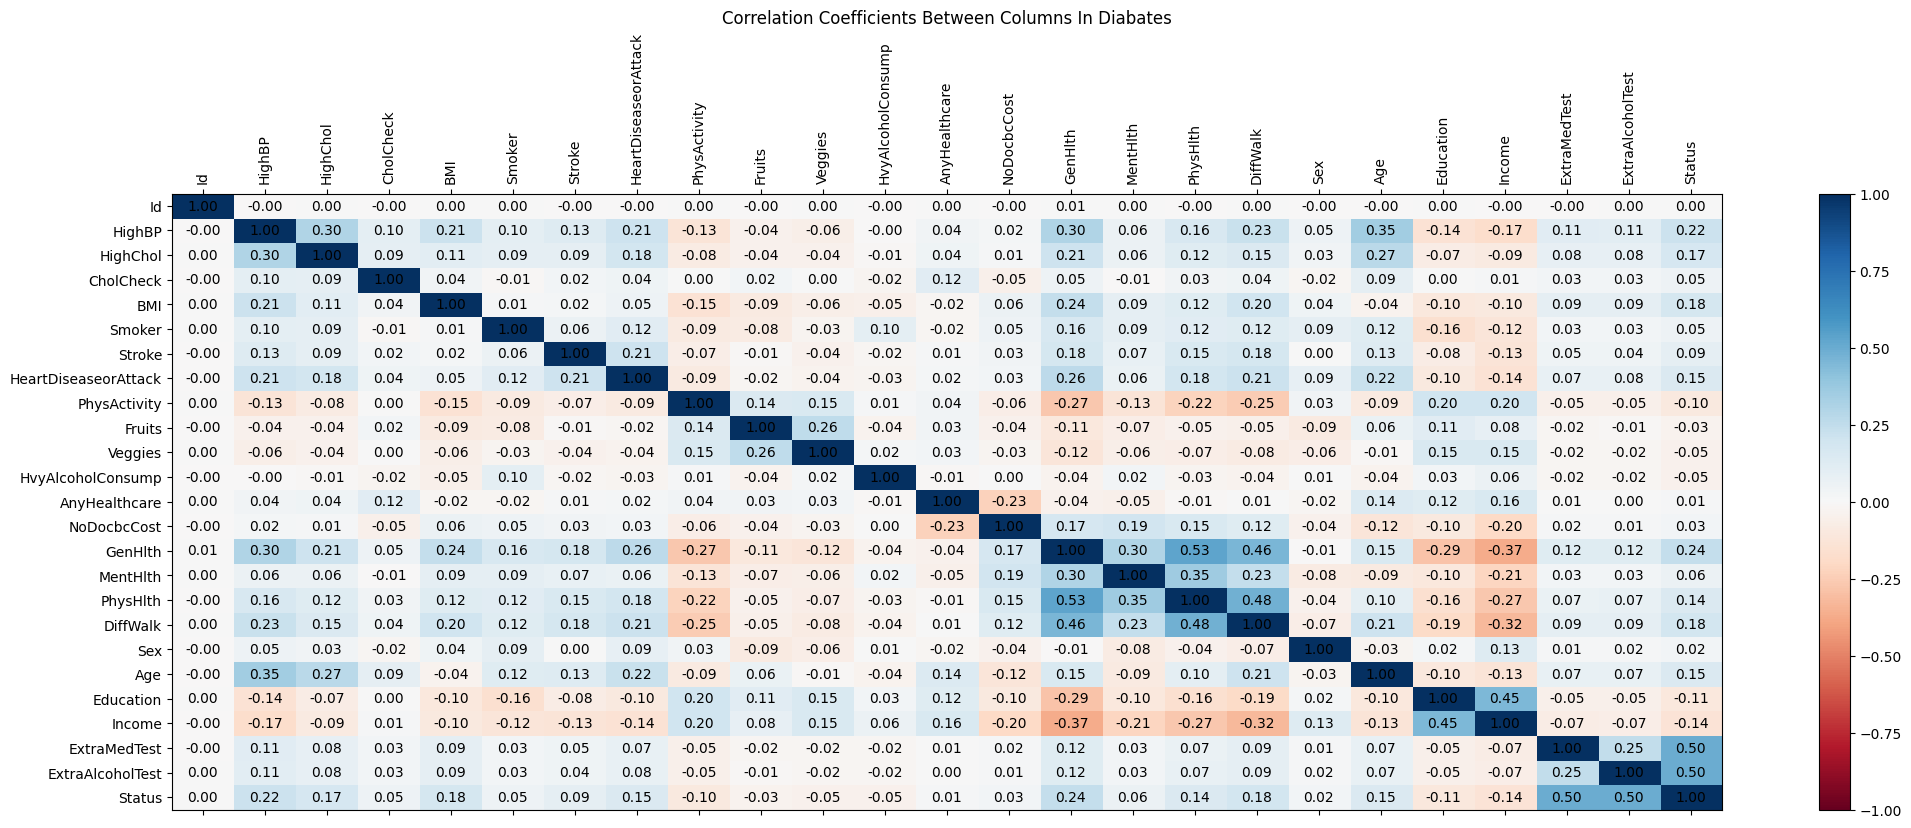

In [9]:
correlation_matrix = diabates_train_df.corr()
fig, ax = plt.subplots(figsize=(25, 8))
cax = ax.matshow(correlation_matrix, cmap='RdBu', vmin=-1, vmax=1,aspect='auto')
cbar = fig.colorbar(cax)
ticks = np.arange(0, len(diabates_train_df.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(diabates_train_df.columns, rotation=90)
ax.set_yticklabels(diabates_train_df.columns)
plt.title('Correlation Coefficients Between Columns In Diabates')

for i in range(len(diabates_train_df.columns)):
    for j in range(len(diabates_train_df.columns)):
        text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")
plt.show()

> <span style="font-size:1em;">✔</span> **Observations:** 
> - Id attribute is not impacted in dataset due to the coeffiecent is nearly achieve 0 compared to all attributes, thus Id attribute is dropped
> - The majority of columns indicate a weak association. Nevertheless, certain columns, namely GenHlth-PhysHlth, ExtraMedTest - Status (output), and ExtraAlcoholTest - Status, exhibit some notable outstanding rate.


In [57]:
diabates_train_df = diabates_train_df.drop(columns=['Id'], axis=1)

### 1.2:  Histogram

In [58]:
columns = diabates_train_df.columns

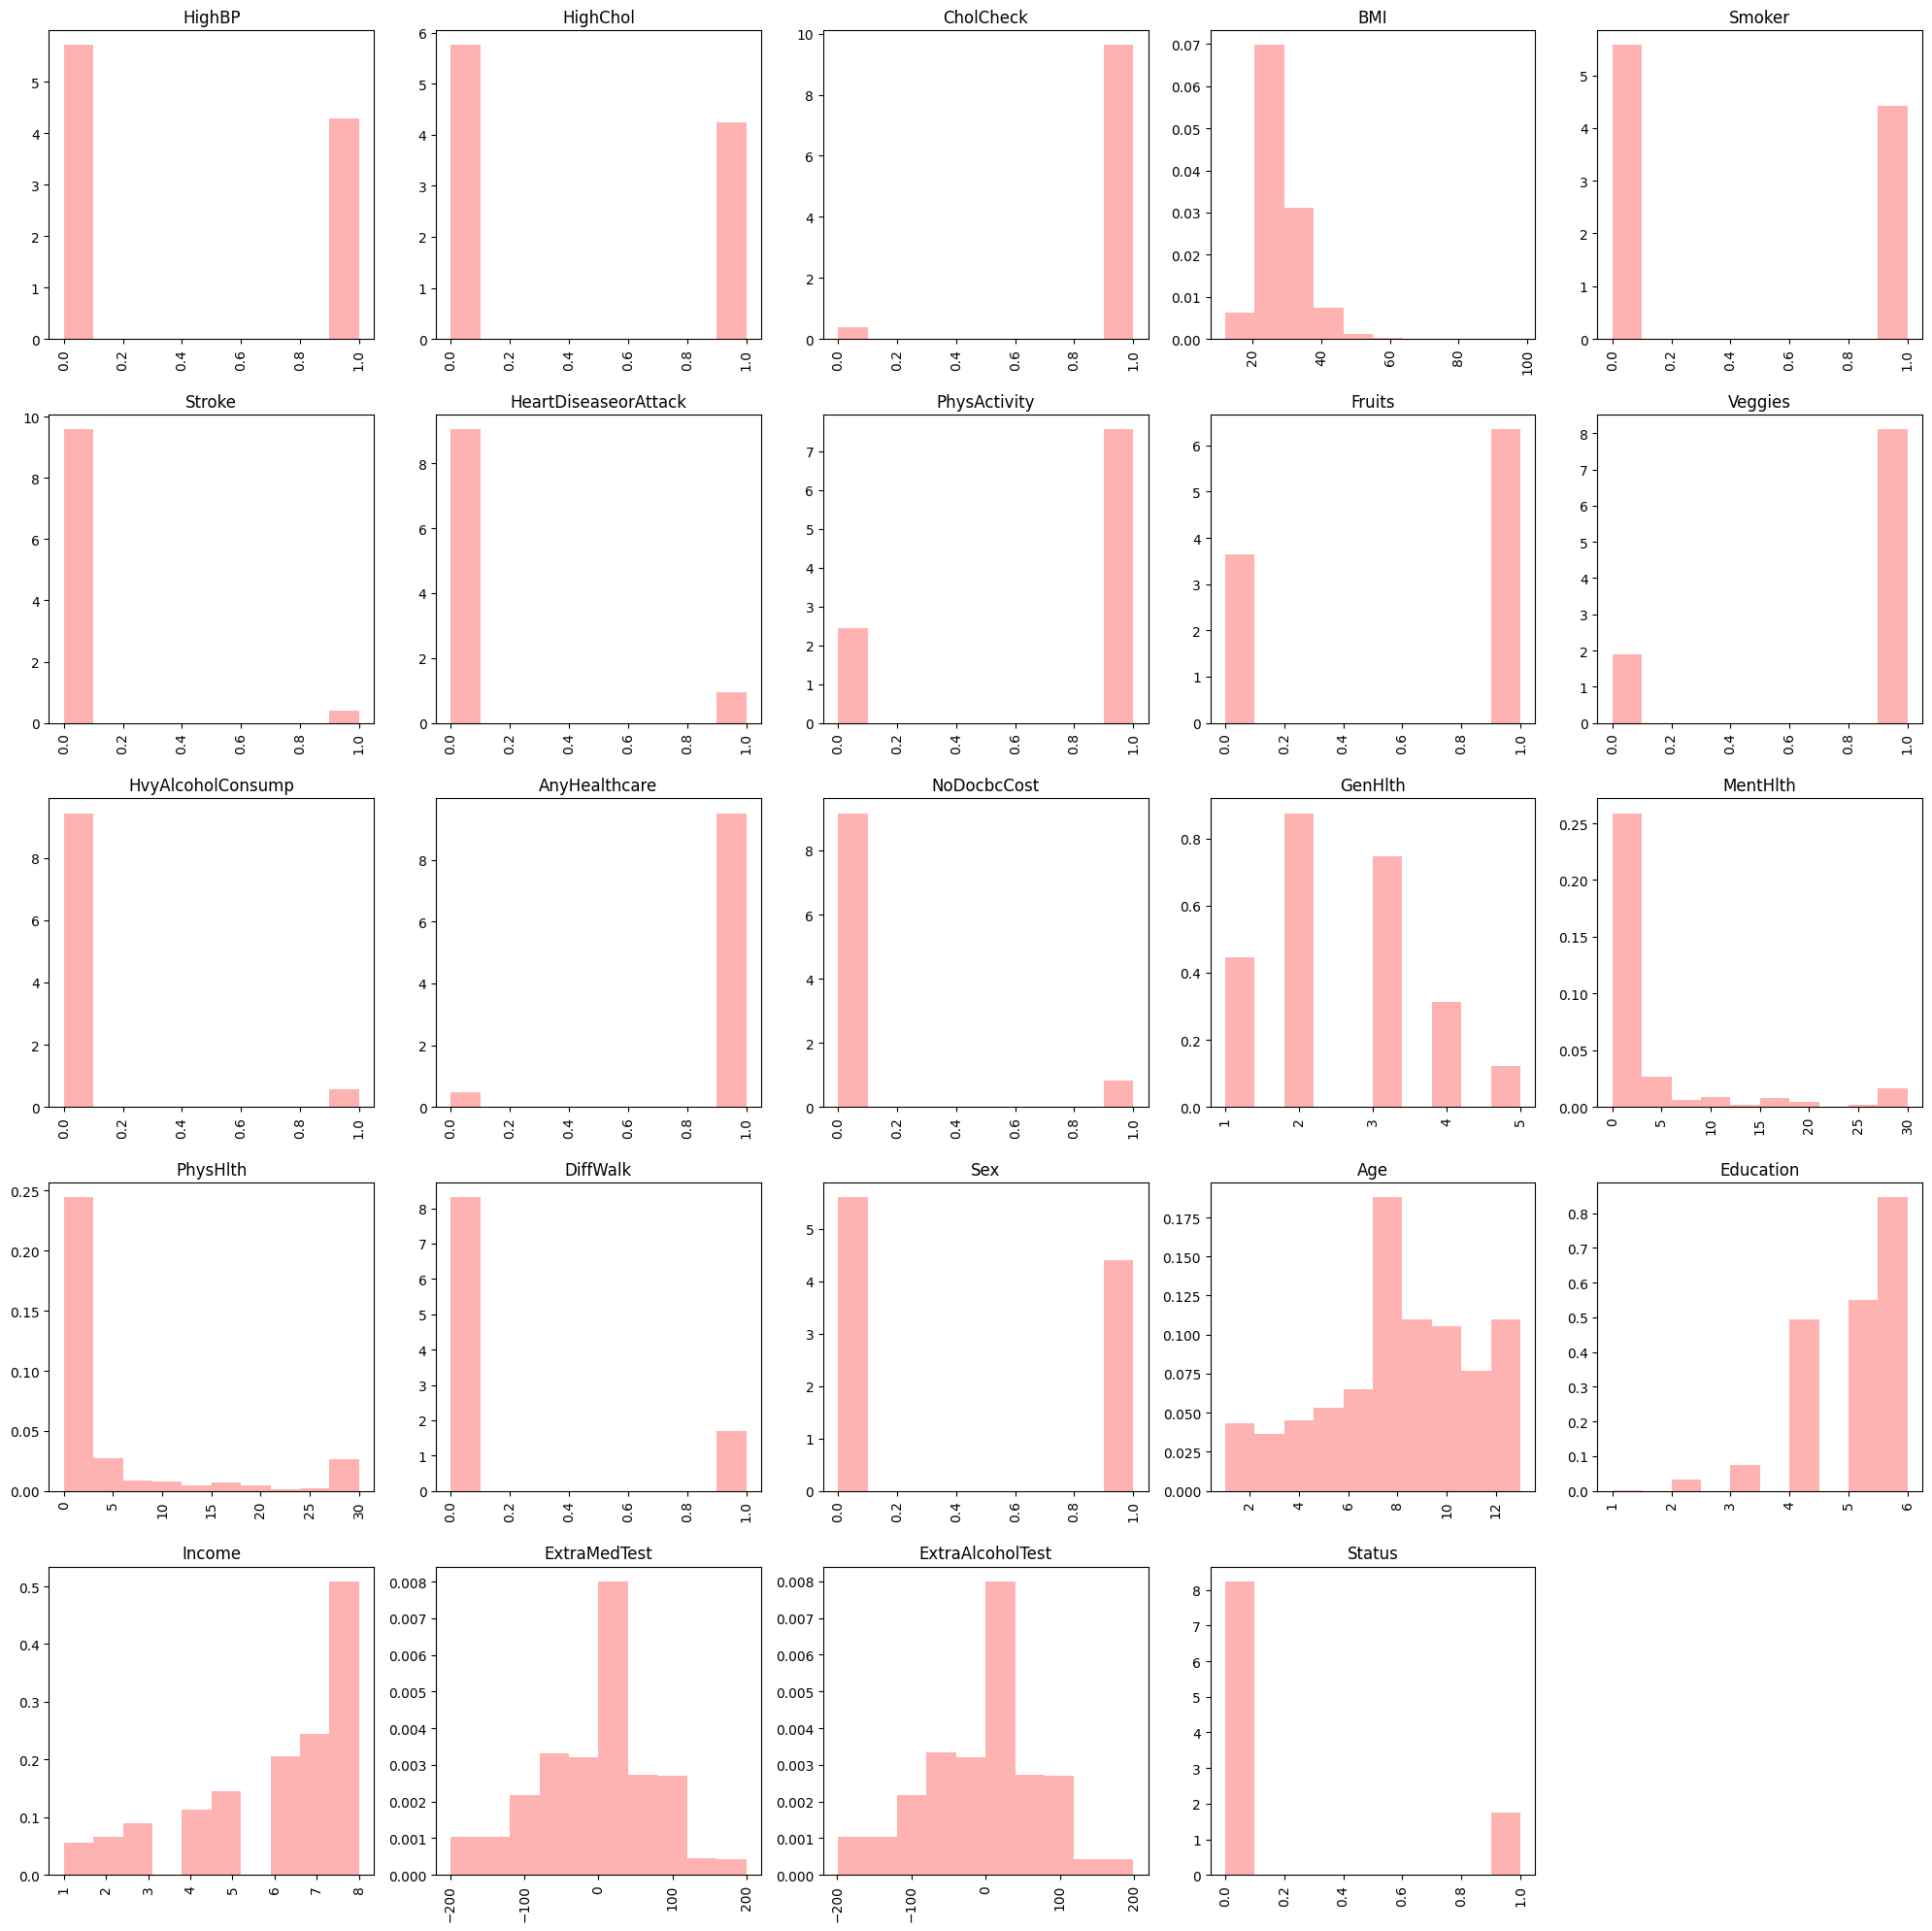

In [12]:
plt.figure(figsize=(20,20))
for i, col in enumerate(diabates_train_df[columns]):
    plt.subplot(5,5,i+1)
    plt.hist(diabates_train_df[columns][col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
plt.tight_layout()

> <span style="font-size:1em;">✔</span> **Observations:** 
> - Most of columns in dataset has categorical type 

### 1.3: Boxplot

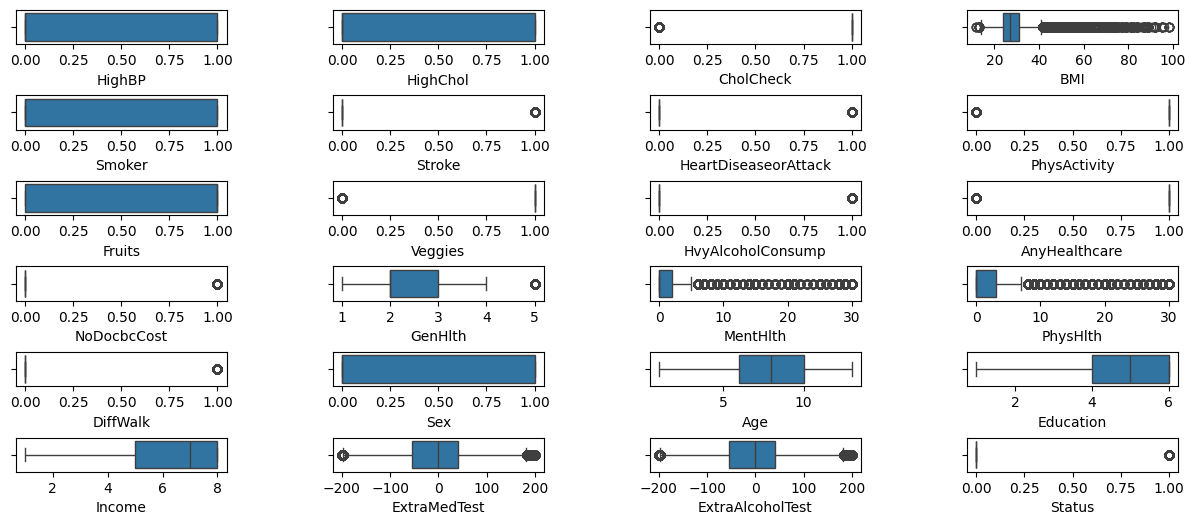

In [43]:
plt.figure(figsize=(15, 6))
for col_idx, col in enumerate(columns):
    plt.subplot(6, 4, col_idx + 1)
    sns.boxplot(data=diabates_train_df, x=col)
plt.subplots_adjust(wspace=0.5, hspace= 1.5)
plt.show()

> <span style="font-size:1em;">✔</span> **Observations:** 
> - BMI, MentHlth, PhysHlth have many outliers.

### 1.4: Distribution plot

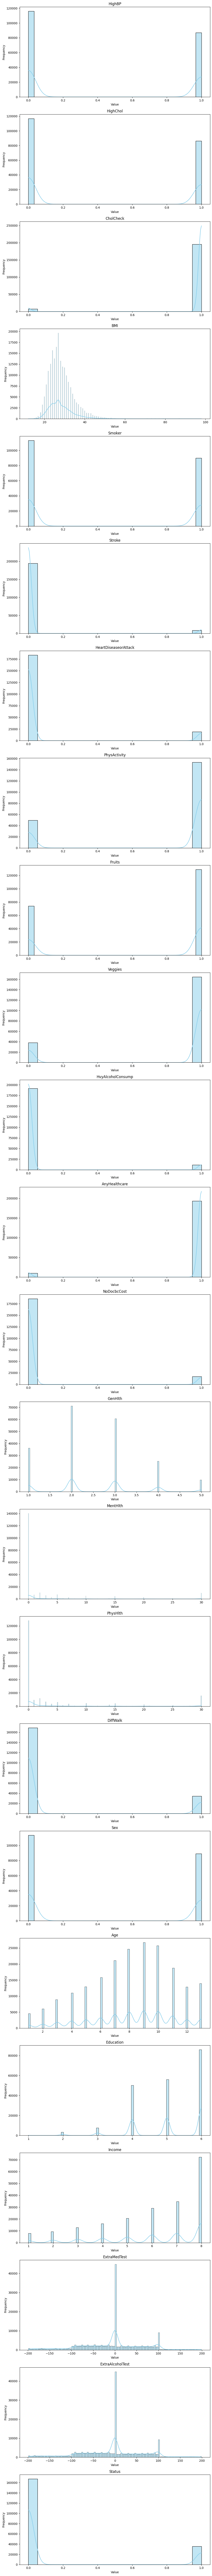

In [14]:
plt.figure(figsize=(10, 5 * len(diabates_train_df.columns)))  # Adjust figsize as needed
for i, column in enumerate(diabates_train_df.columns):
    plt.subplot(len(diabates_train_df.columns), 1, i+1)  # Adjust subplot layout
    sns.histplot(diabates_train_df[column], kde=True, color='skyblue')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


> <span style="font-size:1em;">✔</span> **Observations:** 
> - BMI, MentHlth, PhysHlth columns have many outliers above upper whisker causing a right skew distribution. Therefore, when replacing outliers of these columns, I suggest to replace with median because median does not affect by outliers

### 1.5: Replace outliers using median

In [59]:
def replace_outliers_with_median(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = ((df[cols] < lower_bound) | (df[cols] > upper_bound))

    # Replace outliers with median value for each column
    for col in cols:
        median_val = df[col].median()
        df.loc[outliers[col], col] = median_val

    return df


In [60]:
# Replace outliers with median for columns 'BMI', 'MentHlth', and 'PhysHlth'
diabates_train_df = replace_outliers_with_median(diabates_train_df, ['BMI','MentHlth','PhysHlth'])

# Print the DataFrame with outliers replaced by the median
diabates_train_df.head()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,24,1,0,0,1,0,1,...,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,...,0,0,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,0,1,1,27,0,0,0,1,0,1,...,0,0,0,0,9,5,4,-58,0,0


### 1.6: Boxplot after replace outliers with median

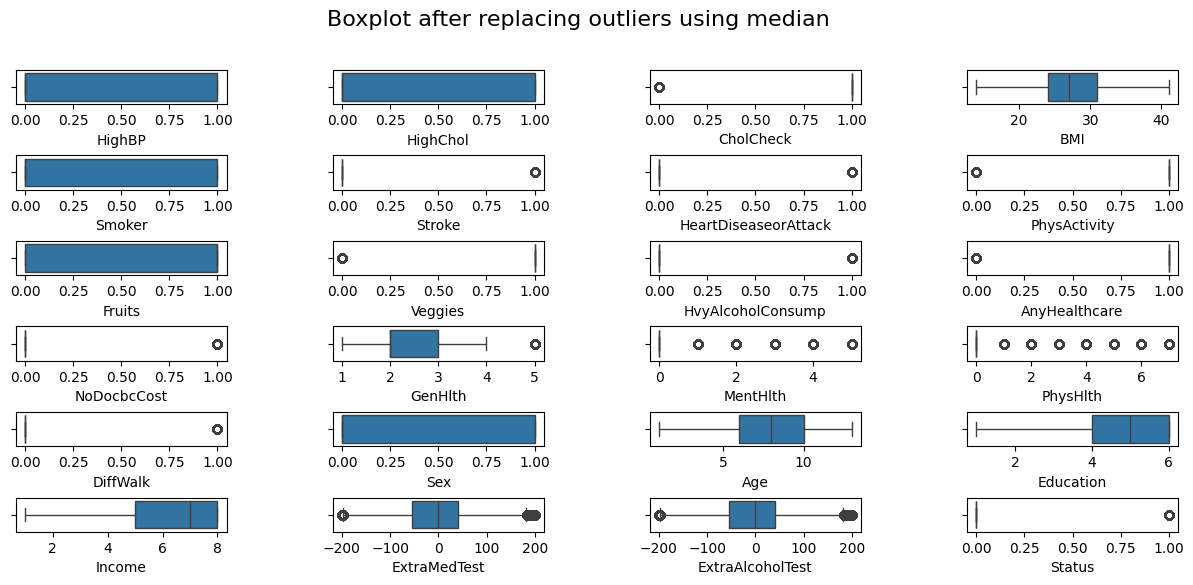

In [17]:
plt.figure(figsize=(15, 6))
for col_idx, col in enumerate(columns):
    plt.subplot(6, 4, col_idx + 1)
    sns.boxplot(data=diabates_train_df, x=col)
plt.subplots_adjust(wspace=0.5, hspace= 1.5)
plt.suptitle('Boxplot after replacing outliers using median', fontsize=16)
plt.show()

### 1.7: Histogram after replacing outliers with median

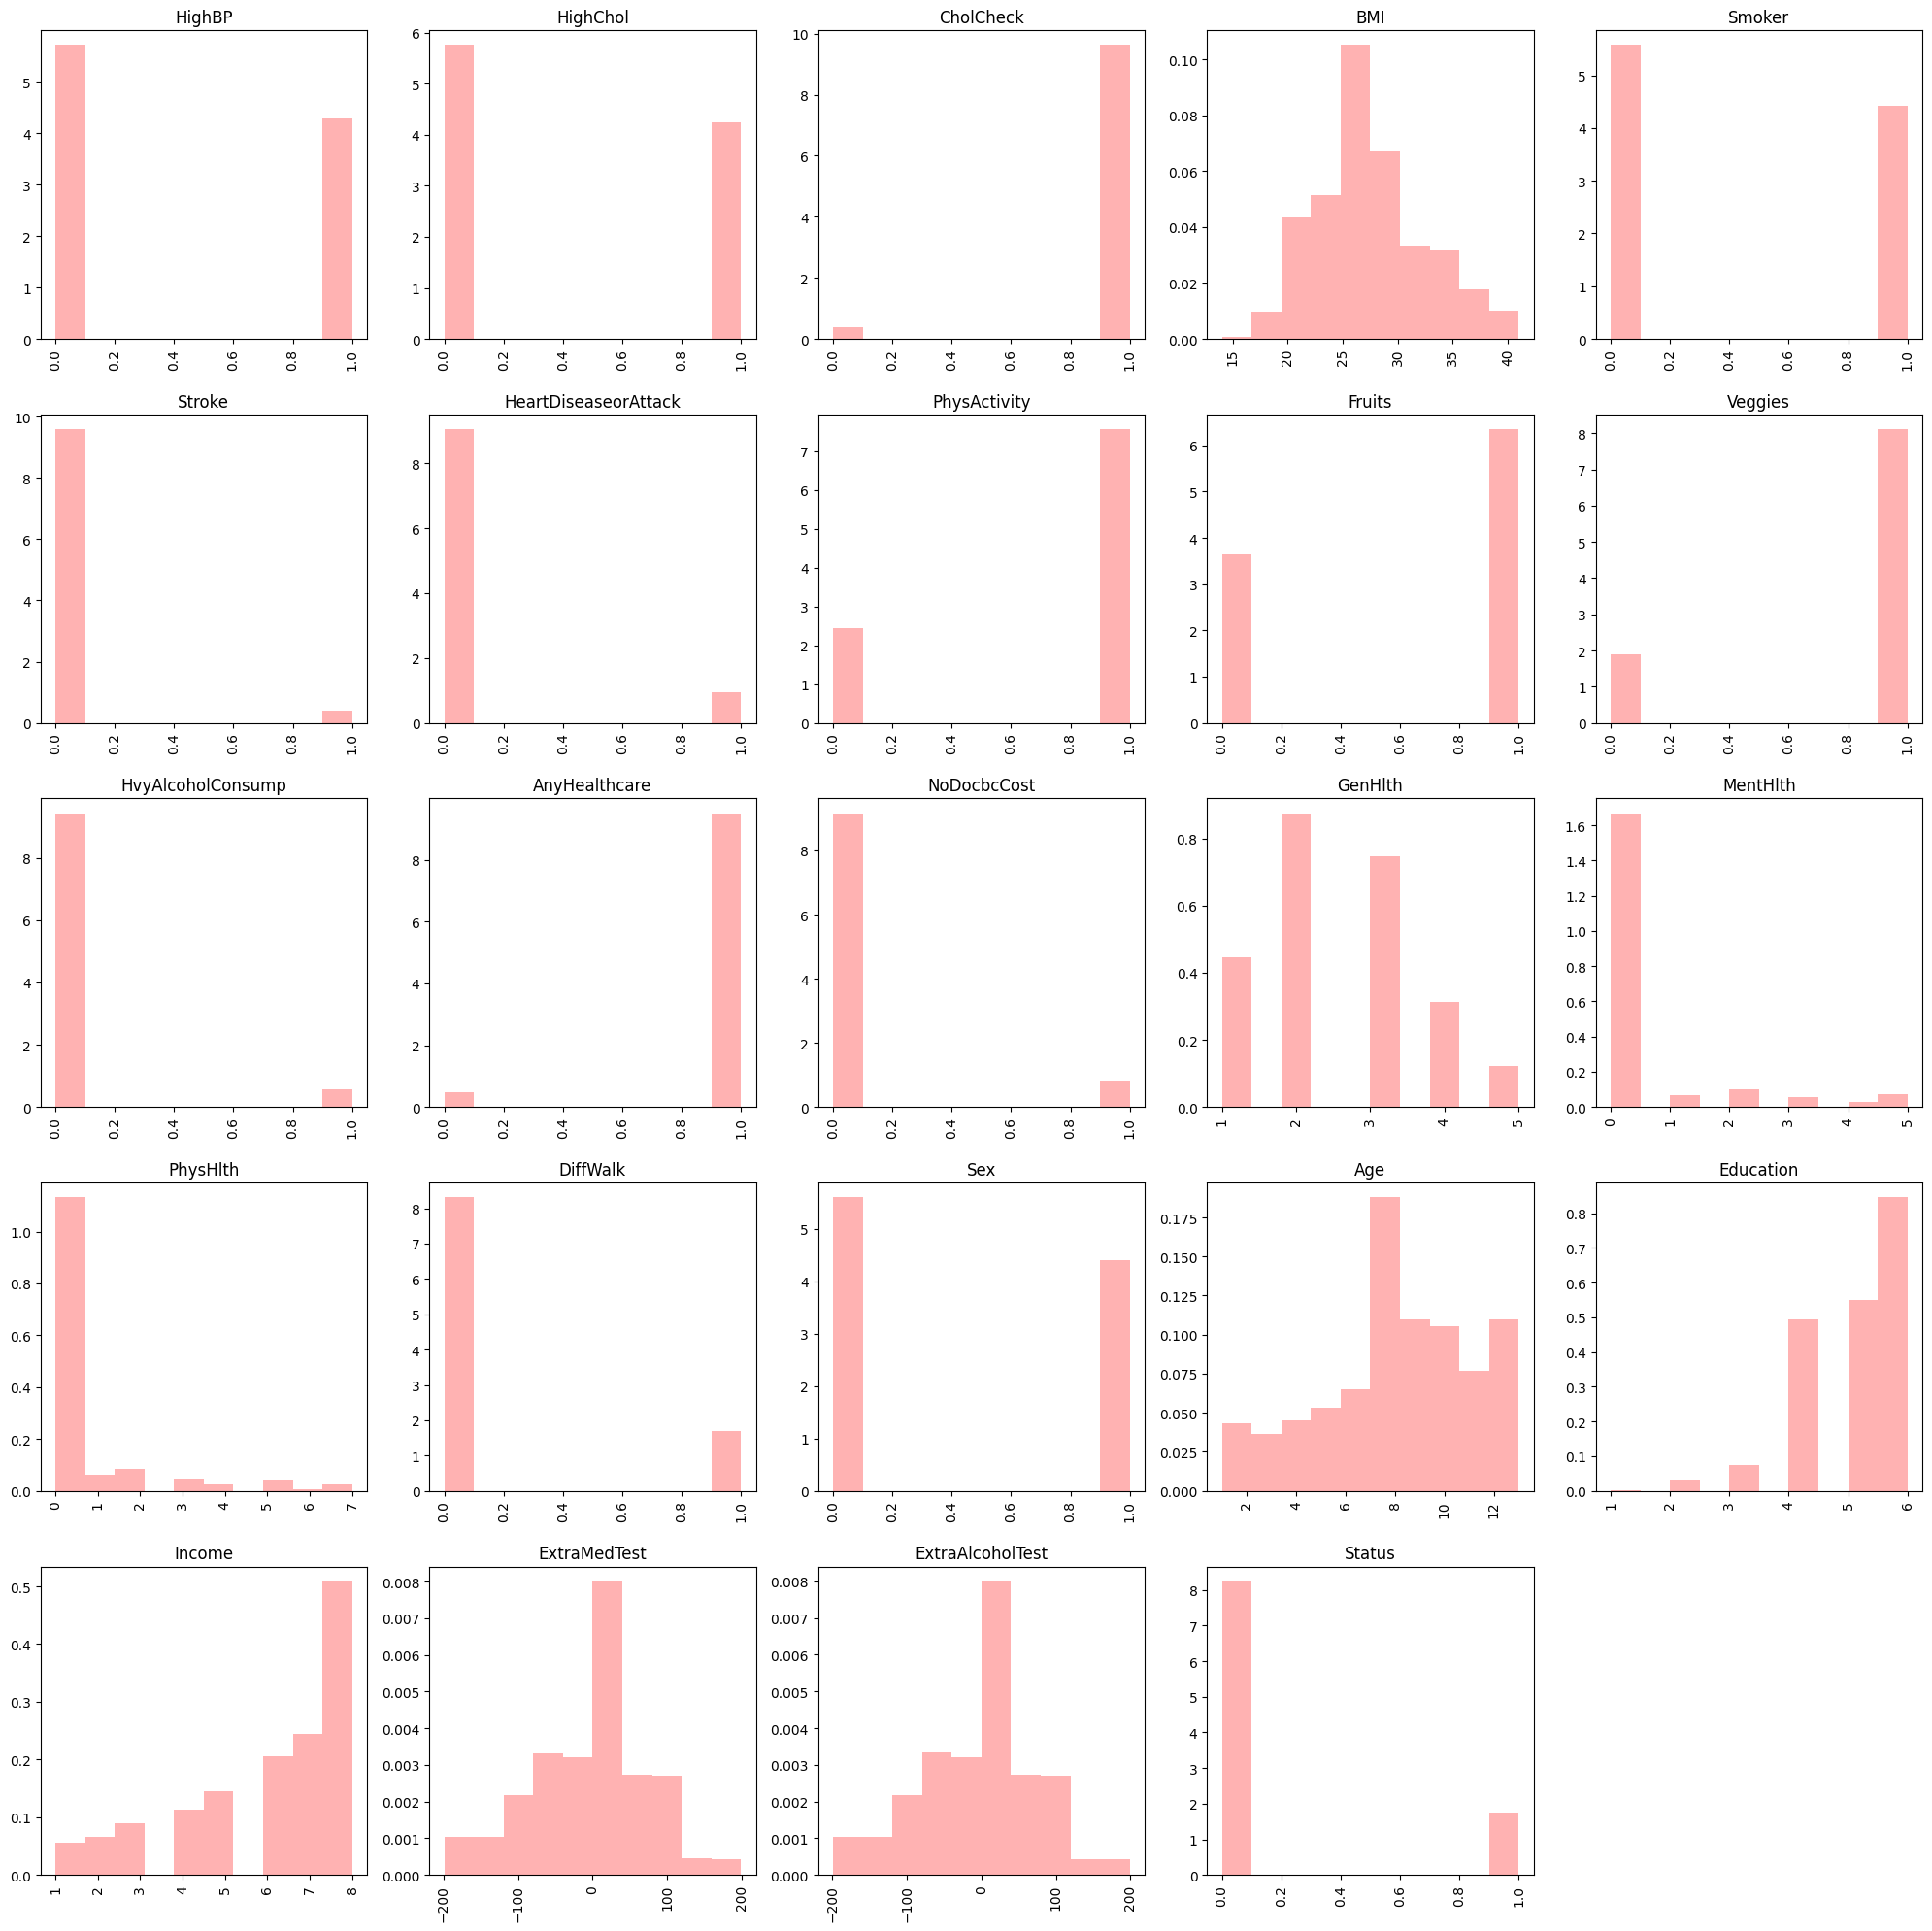

In [18]:
plt.figure(figsize=(20,20))
for i, col in enumerate(diabates_train_df[columns]):
    plt.subplot(5,5,i+1)
    plt.hist(diabates_train_df[columns][col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
plt.tight_layout()

### 1.8: Normalization

In [61]:
# Robust scaler
from sklearn.preprocessing import RobustScaler
scaled_columns = ['BMI','MentHlth','PhysHlth','ExtraMedTest','ExtraAlcoholTest']
scaler = RobustScaler()

# Extract the columns to be scaled from the dataframe
scaled_data = diabates_train_df[scaled_columns]

# Fit the scaler to the data and transform it
scaled_data_transformed = scaler.fit_transform(scaled_data)

# Convert the scaled data back to a DataFrame
scaled_data_df = pd.DataFrame(scaled_data_transformed, columns=scaled_columns)

diabates_train_df[scaled_columns] = scaled_data_df
diabates_train_df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,-0.428571,1,0,0,1,0,1,...,0.0,0.0,0,0,8,4,5,0.631579,0.000000,0
1,0,0,1,0.142857,0,0,0,1,1,1,...,1.0,0.0,0,0,2,6,8,0.000000,-0.673684,0
2,0,0,1,1.285714,1,0,0,1,1,0,...,0.0,0.0,1,0,3,2,1,-0.484211,0.000000,0
3,0,1,1,1.142857,0,0,0,1,1,1,...,0.0,0.0,0,0,8,6,8,-0.873684,-1.978947,0
4,0,1,1,0.000000,0,0,0,1,0,1,...,0.0,0.0,0,0,9,5,4,-0.610526,0.000000,0


# 2. Training model proposal:
- Logistics regression 
- Decision Tree
- Random Forest
- P/s: provide evidences

In [63]:
diabates_Y = diabates_train_df['Status']
diabates_X = diabates_train_df.drop(columns='Status', axis=1)

## 2.1 Logistics Regression

In [64]:
train_X, val_X, train_Y, val_Y = train_test_split(diabates_X, diabates_Y, test_size= 0.35, shuffle= True)

print(train_X.shape)
print(train_Y.shape)
print(val_X.shape)
print(val_Y.shape)

(131913, 23)
(131913,)
(71031, 23)
(71031,)


In [65]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(train_X)
X_val_poly = poly.fit_transform(val_X)

In [66]:
lgsModel = LogisticRegression(max_iter=1000)
lgsModel.fit(X_train_poly,train_Y)

C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [51]:
def get_evaluation_score(clf, trainX, trainY, validX, validY):
    train_pred = clf.predict(trainX)
    valid_pred = clf.predict(validX)
    
    valid_acc = accuracy_score(val_Y, valid_pred)
    valid_precision = precision_score(val_Y, valid_pred)
    valid_recall = recall_score(val_Y,valid_pred)
    valid_f1 = f1_score(validY, valid_pred, average='macro')
    
    # compare trainY to train_pred to see whether train_f1 is overfitting with valid_f1
    train_f1 = f1_score(trainY, train_pred, average='macro')

    
    return valid_acc,valid_precision,valid_recall,valid_f1, train_f1

### Evaluation metrics of LOGISTICS REGRESSION before using cross-validation

In [67]:
valid_pred_acc, valid_pred_pre, valid_pred_recall, valid_pred_f1, train_f1 = get_evaluation_score(lgsModel,X_train_poly,train_Y,X_val_poly,val_Y)
print("Accuracy of VALID set for prediction: {:.3f}".format(valid_pred_acc))
print("Precision of VALID set for prediction: {:.3f}".format(valid_pred_pre))
print("Recall of VALID set for prediction: {:.3f}".format(valid_pred_recall))

print("F1 score of VALID set for prediction: {:.3f}".format(valid_pred_f1), "\n")
print("F1 score of TRAINING set for prediction: {:.3f}".format(train_f1))

Accuracy of VALID set for prediction: 0.936
Precision of VALID set for prediction: 0.880
Recall of VALID set for prediction: 0.737
F1 score of VALID set for prediction: 0.882 

F1 score of TRAINING set for prediction: 0.883


### Tunning hyperparameter using cross-validation

In [27]:
kFold = KFold(n_splits=5, shuffle=True)

C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.624e+01, tolerance: 1.525e+00
  model = cd_fast.enet_coordinate_descent(


[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 1 [0.24220746039856922, 0.26864307169909885, 0.2816175498876702, 0.30827474310438074, 0.36221352711011734, 0.4241548685351054, 0.4439553990610329]
---------------------------------------------------



C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.596e+01, tolerance: 1.529e+00
  model = cd_fast.enet_coordinate_descent(


[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 2 [0.2513562386980108, 0.2738736371995272, 0.28854596248503395, 0.3109995931099959, 0.3700521200169038, 0.43152680652680653, 0.4466705951679434]
---------------------------------------------------



C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.062e+01, tolerance: 1.532e+00
  model = cd_fast.enet_coordinate_descent(


[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 3 [0.25222629649030903, 0.2754203362690152, 0.2886069114470843, 0.31500414479137884, 0.3719862227324914, 0.4389409489811096, 0.4557228915662651]
---------------------------------------------------



C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.841e+00, tolerance: 1.532e+00
  model = cd_fast.enet_coordinate_descent(


[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 4 [0.2542328389552435, 0.28116639914392727, 0.2926532268975781, 0.31751724137931037, 0.3729344729344729, 0.4326157475670893, 0.4521204855387382]
---------------------------------------------------



C:\Users\Admins\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.296e+00, tolerance: 1.526e+00
  model = cd_fast.enet_coordinate_descent(


[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 5 [0.2425215046860958, 0.2683372487601149, 0.28205128205128205, 0.3106901217861976, 0.3604472396925227, 0.4212200057820179, 0.4395202574228463]
---------------------------------------------------



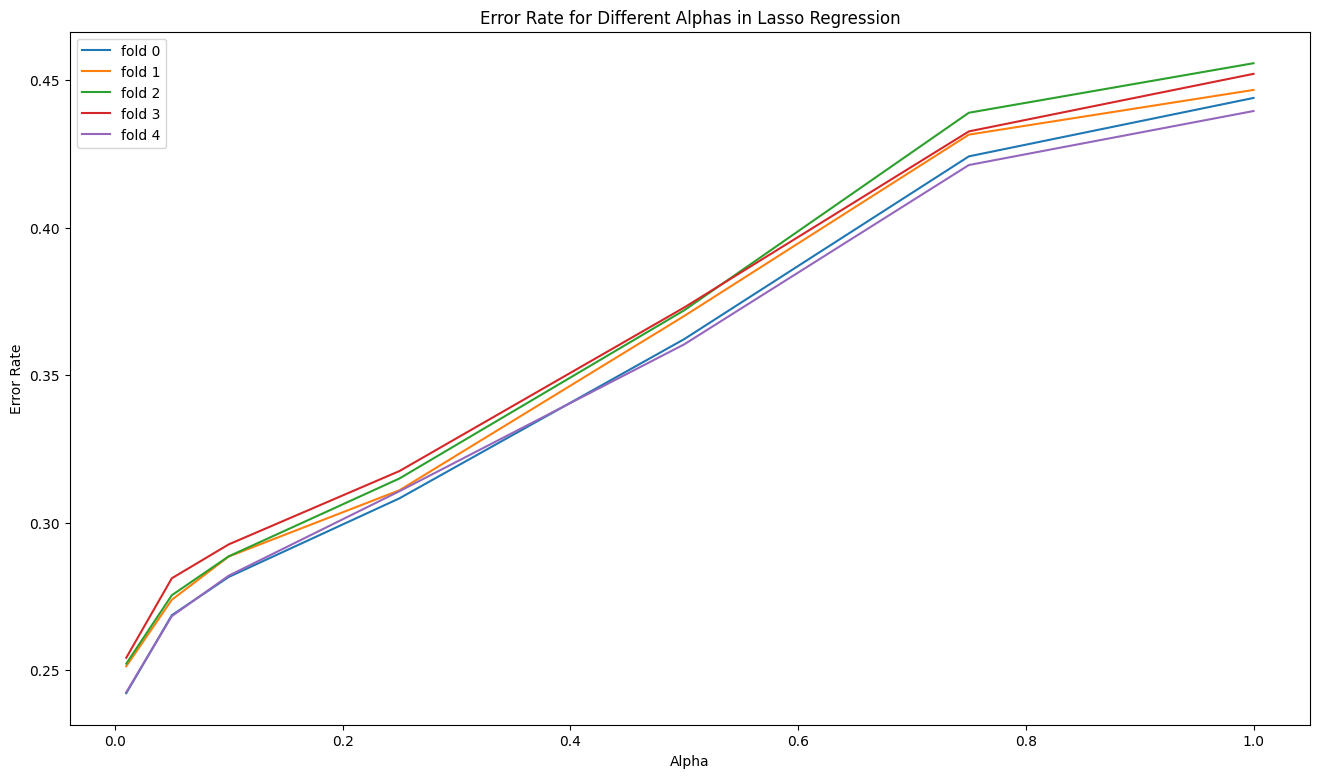

In [31]:
alpha_RegPara = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
final_results = []
i = 0
plt.figure(figsize=(16, 9))
kFold = KFold(n_splits=5)


train_Y = np.array(train_Y)
train_X = np.array(train_X)

# Create the train and the validation sets based on the existing training set
for trainIndex, validIndex in kFold.split(train_X, train_Y):
    # Use 20% of the existing train set to make the validation set
    trainX = train_X[trainIndex]  # Access elements directly from train_X array
    trainY = train_Y[trainIndex]  # Access elements directly from train_Y array
    validX = train_X[validIndex]
    validY = train_Y[validIndex]

    # The rest of your code remains the same
    # We have the training and validation data now
    # We gonna train each model with each alphas by using these training data
    # And then we are going to evaluate MSE of the models by applying them on the validation data
    
    # To store the results of each alphas
    lResults = []
    lModels = []
    
    for regPara in alpha_RegPara:
        ### TRAINING THE LASSO MODEL
        # Create the polynomial regression object
        polyLassoReg = Lasso(alpha = regPara)
        
        # Create, then fit and transform at the same time trainX by using the poly_feat object
        polyFitTrainX = poly.fit_transform(trainX)
        
        # Fit the model
        polyLassoReg.fit(polyFitTrainX, trainY)
        
        ### VALIDATE THE LASSO MODEL WITH THE VALIDATION DATA
        # Create, then fit and transform at the same time validationX by using the poly_feat object
        polyFitValidX = poly.fit_transform(validX)
        
        # Predict Y by using the validation set
        predY = polyLassoReg.predict(polyFitValidX)
        
        # Convert continuous predictions to binary using a threshold of 0.5
        binary_predY = (predY > 0.5).astype(int)

        
        # Calculate F1-score
        f1 = f1_score(validY, binary_predY)
        lResults.append(1 - f1)  # F1-score is in range [0, 1], so we subtract it from 1 to get error rate
     
        
    i = i + 1
    
    print(alpha_RegPara)
    print("Fold",i,lResults)
    print("---------------------------------------------------")
    print("")
    plt.xlabel('Alpha')
    plt.ylabel('Error Rate')
    plt.title('Error Rate for Different Alphas in Lasso Regression')
    final_results.append(lResults)
    plt.plot(alpha_RegPara, lResults)
    plt.legend(['fold ' + str(i) for i in range(5)])

[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 1 [0.21516164994425868, 0.21516164994425868, 0.21516164994425868, 0.21516164994425868, 0.21531219028741333, 0.21531219028741333, 0.2150111468912559]
---------------------------------------------------

[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 2 [0.2246728971962617, 0.22446437468858993, 0.22446437468858993, 0.22436775881400273, 0.22436775881400273, 0.22436775881400273, 0.22436775881400273]
---------------------------------------------------

[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 3 [0.2238730158730159, 0.2238730158730159, 0.2238730158730159, 0.22377444754889508, 0.22377444754889508, 0.22367585418518987, 0.22367585418518987]
---------------------------------------------------

[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
Fold 4 [0.2303206997084548, 0.2303206997084548, 0.23047667342799194, 0.2300671821523641, 0.230008870865543, 0.230008870865543, 0.22985301571211358]
---------------------------------------------------

[0.01, 0.05, 0.1, 0.25, 0.5,

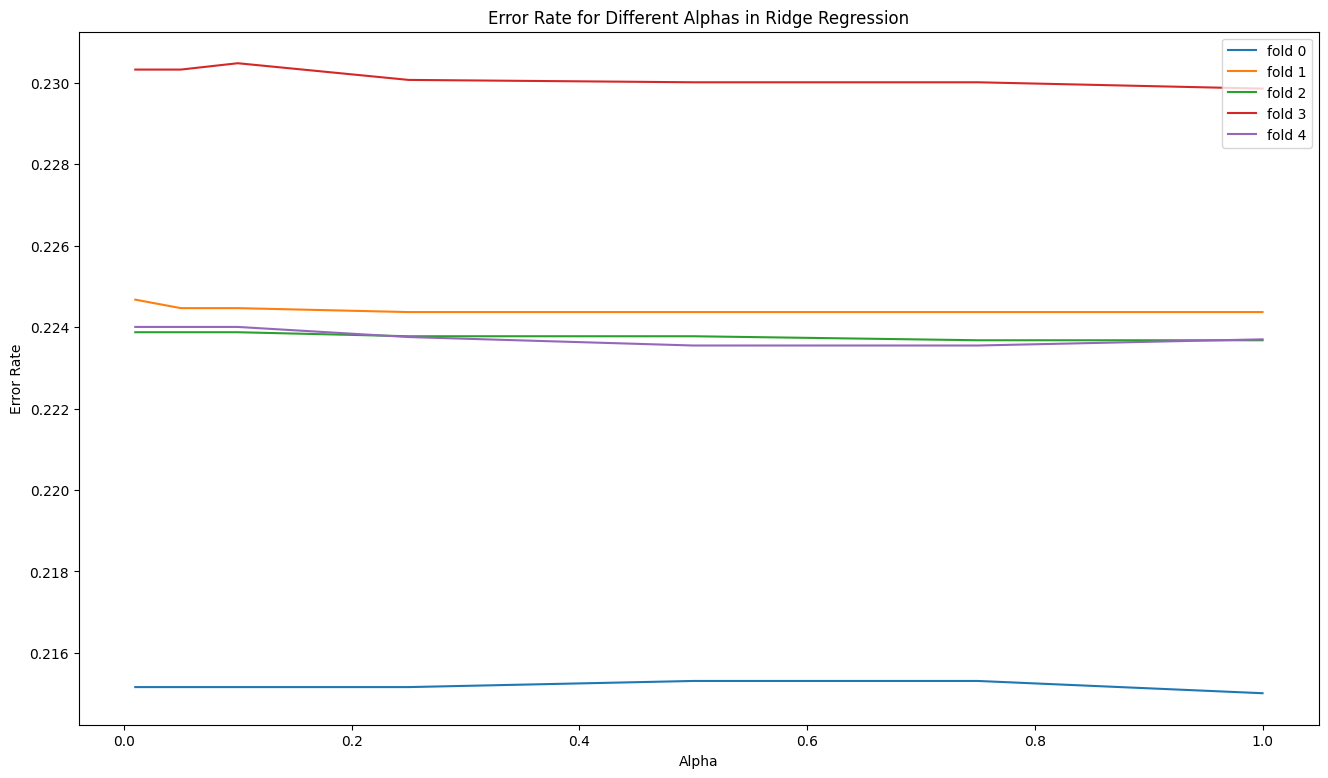

In [33]:
alpha_RegPara = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
final_results = []
i = 0
plt.figure(figsize=(16, 9))
kFold = KFold(n_splits=5)


train_Y = np.array(train_Y)

# Create the train and the validation sets based on the existing training set
for trainIndex, validIndex in kFold.split(train_X, train_Y):
    # Use 20% of the existing train set to make the validation set
    trainX = train_X[trainIndex]  # Access elements directly from train_X array
    trainY = train_Y[trainIndex]  # Access elements directly from train_Y array
    validX = train_X[validIndex]
    validY = train_Y[validIndex]

    # The rest of your code remains the same
    # We have the training and validation data now
    # We gonna train each model with each alphas by using these training data
    # And then we are going to evaluate MSE of the models by applying them on the validation data
    
    # To store the results of each alphas
    lResults = []
    lModels = []
    
    for regPara in alpha_RegPara:
        ### TRAINING THE LASSO MODEL
        # Create the polynomial regression object
        polyRidgeReg = Ridge(alpha = regPara)
        
        # Create, then fit and transform at the same time trainX by using the poly_feat object
        polyFitTrainX = poly.fit_transform(trainX)
        
        # Fit the model
        polyRidgeReg.fit(polyFitTrainX, trainY)
        
        ### VALIDATE THE LASSO MODEL WITH THE VALIDATION DATA
        # Create, then fit and transform at the same time validationX by using the poly_feat object
        polyFitValidX = poly.fit_transform(validX)
        
        # Predict Y by using the validation set
        predY = polyRidgeReg.predict(polyFitValidX)
        
        predY_binary = (predY > 0.5).astype(int)
        
        # Calculate the MSE
        f1 = f1_score(predY_binary,validY)
        
        # Store the MSE result of the current model
        lResults.append(1 - f1)
        
    i = i + 1
    
    print(alpha_RegPara)
    print("Fold",i,lResults)
    print("---------------------------------------------------")
    print("")
    final_results.append(lResults)
    plt.xlabel('Alpha')
    plt.ylabel('Error Rate')
    plt.title('Error Rate for Different Alphas in Ridge Regression')
    plt.plot(alpha_RegPara, lResults)
    plt.legend(['fold ' + str(i) for i in range(5)])

> <span style="font-size:1em;">✔</span> **Observations:** 
> - Choosing Ridge polynomial logistics regression because as we can see, an error rate in each fold is small and stable even if it runs in different alpha

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer

f1_scorer = make_scorer(f1_score, average='weighted')
lambda_paras = np.logspace(-10, 2, num=5)

cv_results = dict()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             solver='liblinear', max_iter=200, 
                             class_weight='balanced')
    
    scores = cross_validate(clf, X_train_poly, train_Y, 
                            scoring=f1_scorer, return_estimator=True,
                            return_train_score=True, cv=5)
    
    cv_results[lambda_para] = scores

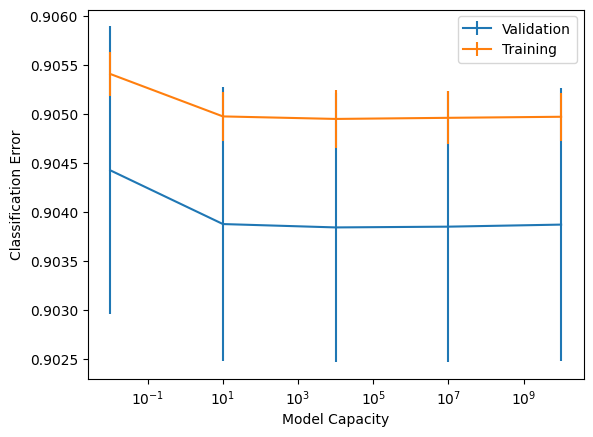

In [14]:
fig, ax = plt.subplots()

val_means = [np.mean(cv_results[lambda_para]['test_score']) 
             for lambda_para in lambda_paras]

val_std = [np.std(cv_results[lambda_para]['test_score']) 
           for lambda_para in lambda_paras]

train_means = [np.mean(cv_results[lambda_para]['train_score']) 
               for lambda_para in lambda_paras]

train_std = [np.std(cv_results[lambda_para]['train_score']) 
             for lambda_para in lambda_paras]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            val_means,
            yerr=val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            train_means,
            yerr=train_std)

plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Validation','Training',])
plt.show()

> <span style="font-size:1em;">✔</span> **Observations:** 
> - This graph illustrates how well a model predicts in training and validation dataset. In x-axis represents model capacity which is also known as lambda, while y-axis represents classification error which is the rate of misclassification. Misclassification rate is a metric used to evaluate the proportion of misclassified instances in the dataset. Thus, we want this rate as small as possible. Based on graph above, I would like to choose lambda equal to 10^-1.5, this value is satisfied and minimizes error between two model prediction 

In [15]:
clf = LogisticRegression(penalty='l2', C = 0.03,
                             solver='liblinear', max_iter=1000, 
                             class_weight='balanced')
clf.fit(X_train_poly,train_Y)

LogisticRegression(C=0.03, class_weight='balanced', max_iter=1000,
                   solver='liblinear')

### Evaluation metrics of LOGISTICS REGRESSION after using cross-validation

In [18]:
valid_pred_acc, valid_pred_pre, valid_pred_recall, valid_pred_f1, train_f1 = get_evaluation_score(clf,X_train_poly,train_Y,X_val_poly,val_Y)
print("Accuracy of VALID set for prediction: {:.3f}".format(valid_pred_acc))
print("Precision of VALID set for prediction: {:.3f}".format(valid_pred_pre))
print("Recall of VALID set for prediction: {:.3f}".format(valid_pred_recall))

print("F1 score of VALID set for prediction: {:.3f}".format(valid_pred_f1), "\n")
print("F1 score of TRAINING set for prediction: {:.3f}".format(train_f1))

Accuracy of VALID set for prediction: 0.896
Precision of VALID set for prediction: 0.653
Recall of VALID set for prediction: 0.871
F1 score of VALID set for prediction: 0.841 

F1 score of TRAINING set for prediction: 0.847


> <span style="font-size:1em;">✔</span> **Observations:** 
> - F1 score of training and valid is quite equalized. However, score is still not high enough to predict unseen data

## 2.2 Decision tree

In [25]:
# import graphviz

# def get_tree_2_plot(clf):
#     dot_data = tree.export_graphviz(clf, out_file=None, 
#                       feature_names= diabates_X.columns,  
#                       class_names= diabates_Y_to_numpy,  
#                       filled=True, rounded=True,  
#                       special_characters=True)  
#     graph = graphviz.Source(dot_data) 
#     return graph

In [68]:
from sklearn import tree
tree_max_depth = 4

dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=tree_max_depth, class_weight='balanced',)
dt_clf.fit(train_X,train_Y)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4)

### Evaluation metrics of DECISION TREE before using cross-validation

In [69]:
valid_pred_acc, valid_pred_pre, valid_pred_recall, valid_pred_f1, train_f1 = get_evaluation_score(dt_clf,train_X,train_Y,val_X, val_Y)
print("Accuracy of VALID set for prediction: {:.3f}".format(valid_pred_acc))
print("Precision of VALID set for prediction: {:.3f}".format(valid_pred_pre))
print("Recall of VALID set for prediction: {:.3f}".format(valid_pred_recall))

print("F1 score of VALID set for prediction: {:.3f}".format(valid_pred_f1), "\n")
print("F1 score of TRAINING set for prediction: {:.3f}".format(train_f1))

Accuracy of VALID set for prediction: 0.930
Precision of VALID set for prediction: 0.759
Recall of VALID set for prediction: 0.886
F1 score of VALID set for prediction: 0.887 

F1 score of TRAINING set for prediction: 0.886


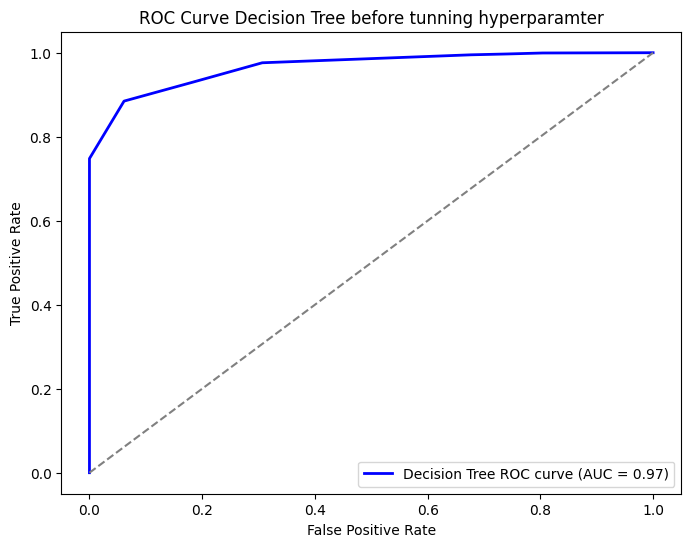

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for positive class
y_probs = dt_clf.predict_proba(val_X)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(val_Y, y_probs)

# Compute ROC AUC score
roc_auc = roc_auc_score(val_Y, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Decision Tree ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Decision Tree before tunning hyperparamter')
plt.legend(loc='lower right')
plt.show()


### Tunning hyperparameter and cross-validation (pre-prunning)

In [23]:
parameters = {'max_depth':np.arange(2,400, 50), 'min_samples_split':np.arange(2,50,5)}

dt_clf = tree.DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
Gridclf = GridSearchCV(dt_clf, parameters, scoring='f1_macro')
Gridclf.fit(train_X, train_Y)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'max_depth': array([  2,  52, 102, 152, 202, 252, 302, 352]),
                         'min_samples_split': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])},
             scoring='f1_macro')

> <span style="font-size:1em;">✔</span> **Observations:** </br>
> <span style= "font-size: 0.8em;"></span> max_depth: np.arange(2,400,50)
> - The max_depth parameter controls the maximum depth of the decision tree. A deeper tree can capture more complex relationships in the training data but also increases the risk of overfitting. 
> - By starting from a minimum value of 2 and incrementing by 50 up to 400, the range covers a wide spectrum of tree depths, from shallow trees to very deep trees.
> - Starting from a low value of 2 ensures that the decision tree is not too shallow, which might lead to underfitting, while stopping at 400 prevents excessively deep trees, which could result in overfitting or computational inefficiency

> <span style= "font-size: 0.8em;"></span> min_samples_split: np.arange(2,50,5)
> - The min_samples_split parameter sets the minimum number of samples required to split an internal node. It controls how finely the tree can partition the data
> - Starting from 2 ensures that the tree can split even if there are only two samples in a node, allowing for fine-grained partitions
> - Incrementing by 5 provides a moderate increase in the number of samples required for splitting, which helps in controlling the complexity of the tre
> - Stopping at 50 ensures that splits are not overly restrictive, allowing the tree to capture meaningful patterns in the data without being too sensitive to individual data points

In [24]:
pd.DataFrame(Gridclf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.066679,0.005849,0.007441,0.002721,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.865116,0.866563,0.863704,0.914779,0.861989,0.874430,0.020231,15
1,0.066487,0.001555,0.004866,0.002744,2,7,"{'max_depth': 2, 'min_samples_split': 7}",0.865116,0.866563,0.863704,0.914779,0.861989,0.874430,0.020231,15
2,0.065005,0.004379,0.010348,0.006478,2,12,"{'max_depth': 2, 'min_samples_split': 12}",0.865116,0.866563,0.863704,0.914779,0.861989,0.874430,0.020231,15
3,0.065745,0.003917,0.005738,0.003329,2,17,"{'max_depth': 2, 'min_samples_split': 17}",0.865116,0.866563,0.863704,0.914779,0.861989,0.874430,0.020231,15
4,0.063702,0.003190,0.011688,0.005263,2,22,"{'max_depth': 2, 'min_samples_split': 22}",0.865116,0.866563,0.863704,0.914779,0.861989,0.874430,0.020231,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.255131,0.003558,0.007885,0.004661,352,27,"{'max_depth': 352, 'min_samples_split': 27}",0.865963,0.863106,0.863363,0.867269,0.865444,0.865029,0.001584,71
76,0.245940,0.002885,0.012963,0.003351,352,32,"{'max_depth': 352, 'min_samples_split': 32}",0.867208,0.866177,0.864182,0.867346,0.865670,0.866117,0.001153,54
77,0.246165,0.005208,0.008524,0.007094,352,37,"{'max_depth': 352, 'min_samples_split': 37}",0.867783,0.864470,0.865082,0.865816,0.865074,0.865645,0.001151,63
78,0.244843,0.008317,0.012075,0.003631,352,42,"{'max_depth': 352, 'min_samples_split': 42}",0.868998,0.865199,0.866877,0.867016,0.867002,0.867018,0.001204,44


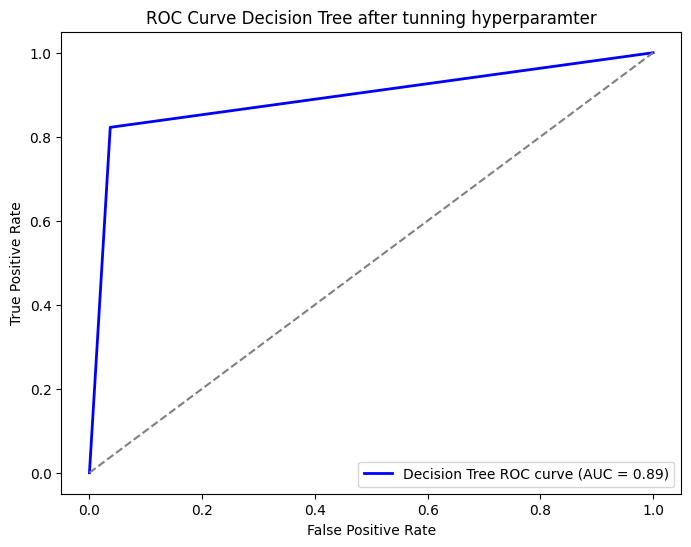

In [25]:
# Get predicted probabilities for positive class
y_probs = Gridclf.predict_proba(val_X)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(val_Y, y_probs)

# Compute ROC AUC score
roc_auc = roc_auc_score(val_Y, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Decision Tree ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Decision Tree after tunning hyperparamter')
plt.legend(loc='lower right')
plt.show()

In [26]:
valid_pred_acc, valid_pred_pre, valid_pred_recall, valid_pred_f1, train_f1 = get_evaluation_score(Gridclf,train_X,train_Y,val_X, val_Y)
print("Accuracy of VALID set for prediction: {:.3f}".format(valid_pred_acc))
print("Precision of VALID set for prediction: {:.3f}".format(valid_pred_pre))
print("Recall of VALID set for prediction: {:.3f}".format(valid_pred_recall))

print("F1 score of VALID set for prediction: {:.3f}".format(valid_pred_f1), "\n")
print("F1 score of TRAINING set for prediction: {:.3f}".format(train_f1))

Accuracy of VALID set for prediction: 0.938
Precision of VALID set for prediction: 0.826
Recall of VALID set for prediction: 0.822
F1 score of VALID set for prediction: 0.893 

F1 score of TRAINING set for prediction: 1.000


> <span style="font-size:1em;">✔</span> **Observations:**
> - F1 score between valid and training dataset has a large margin which indicates overfitting.
> - I try to use post-pruning techique to whether minimize overfitting


### Tunning hyperparameter and cross-validation (post-prunning)

In [27]:
clf = DecisionTreeClassifier(class_weight='balanced')
path = clf.cost_complexity_pruning_path(train_X, train_Y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [30]:
# clfs = []
# for ccp_alpha in ccp_alphas:
#     clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, class_weight='balanced')
#     clf.fit(train_X, train_Y)
#     clfs.append(clf)


# Create an empty list to store the classifiers
clfs = []

# Iterate over each alpha value and perform cross-validation to evaluate model performance
for ccp_alpha in ccp_alphas:
    # Create a DecisionTreeClassifier with the current alpha value
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, class_weight='balanced')
    clf.fit(train_X,train_Y)
    # Store the classifier in the list
    clfs.append(clf)

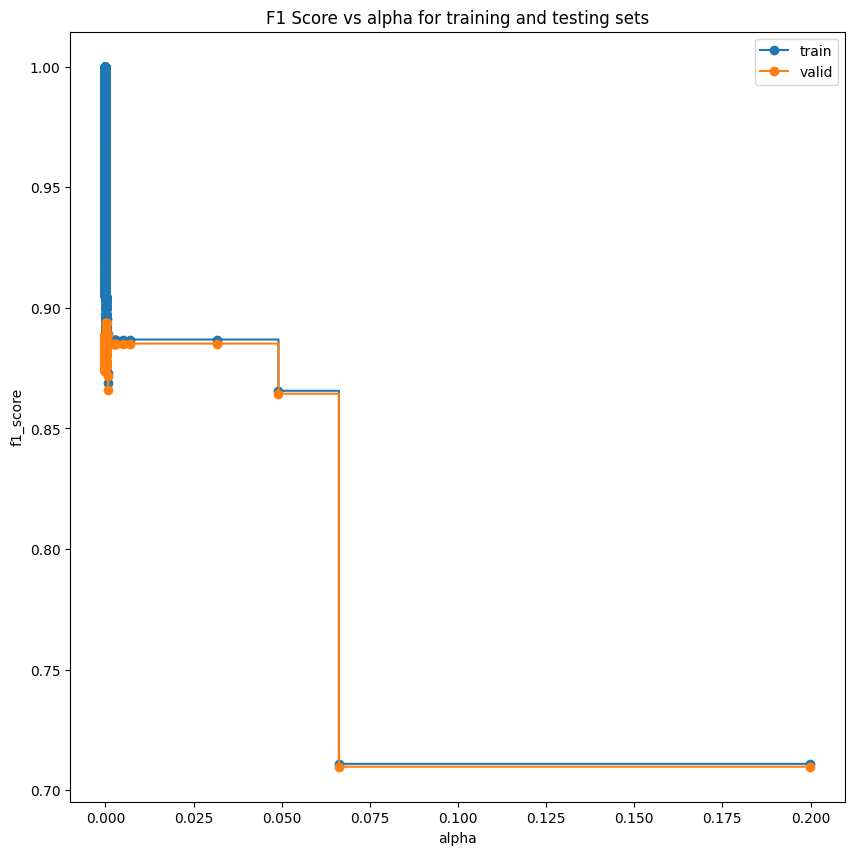

In [31]:
train_scores = [f1_score(train_Y, clf.predict(train_X), average='macro') for clf in clfs]
val_scores = [f1_score(val_Y, clf.predict(val_X), average='macro') for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="valid",
        drawstyle="steps-post")
ax.legend()
plt.show()

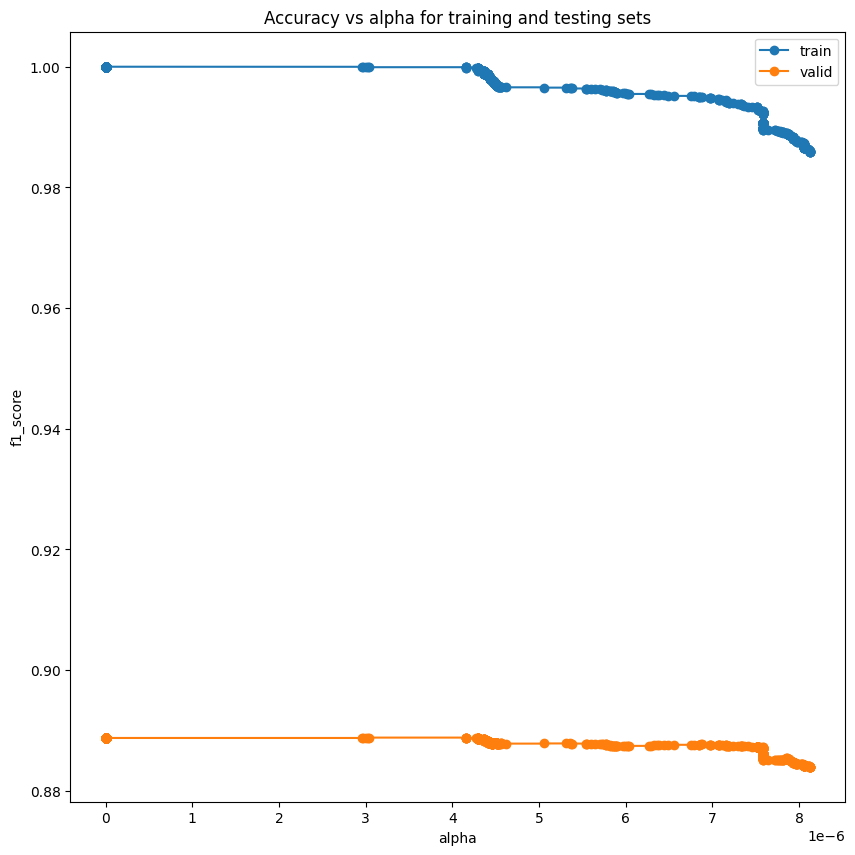

In [32]:
#train_scores = [f1_score(train_y, clf.predict(train_X), average='macro') for clf in clfs]
#val_scores = [f1_score(val_y, clf.predict(val_X), average='macro') for clf in clfs]
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[700:1800], train_scores[700:1800], marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas[700:1800], val_scores[700:1800], marker='o', label="valid",
        drawstyle="steps-post")
ax.legend()
plt.show()

> <span style="font-size:1em;">✔</span> **Observations:**
> - This graph displays F1 score between training and validation set (unseen data). It is clearly to see, F1 score of traning set is dominant over validation set throughout all alpha value which implies an overfitting. The reason behind is due to very small value of alpha. With a very small alpha, the pruning process does not penalize the addition of nodes to the tree significantly. As a result, the decision tree become overly complex, fitting the training data too closely. This lead to overfitting, where the model captures noise or irrelevant patterns in the training data, decreasing its ability to generalize to new, unseen data (shown in figure above).

#### Conclusion:
> - After trying to use both post-pruning and pre-pruning technique, it seems that training data is fitted significantly leading to unwell generalize unseen data. Therefore, I would you random forest model 

## 2.3 Random forest

In [11]:
tree_max_depth = 4
rf = RandomForestClassifier(n_estimators=200,criterion= 'entropy',max_depth=tree_max_depth,class_weight='balanced',random_state=0)
rf.fit(train_X,train_Y)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, n_estimators=200, random_state=0)

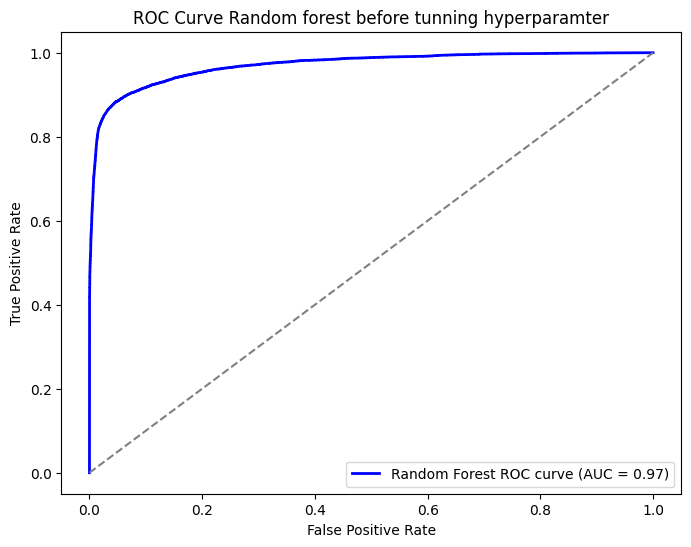

In [14]:
# Get predicted probabilities for positive class
y_probs = rf.predict_proba(val_X)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(val_Y, y_probs)

# Compute ROC AUC score
roc_auc = roc_auc_score(val_Y, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random forest before tunning hyperparamter')
plt.legend(loc='lower right')
plt.show()

### Evaluation metrics of RANDOM FOREST before using cross-validation

In [18]:
valid_pred_acc, valid_pred_pre, valid_pred_recall, valid_pred_f1, train_f1 = get_evaluation_score(rf,train_X,train_Y,val_X, val_Y)
print("Accuracy of VALID set for prediction: {:.3f}".format(valid_pred_acc))
print("Precision of VALID set for prediction: {:.3f}".format(valid_pred_pre))
print("Recall of VALID set for prediction: {:.3f}".format(valid_pred_recall))

print("F1 score of VALID set for prediction: {:.3f}".format(valid_pred_f1), "\n")
print("F1 score of TRAINING set for prediction: {:.3f}".format(train_f1))

Accuracy of VALID set for prediction: 0.942
Precision of VALID set for prediction: 0.804
Recall of VALID set for prediction: 0.881
F1 score of VALID set for prediction: 0.903 

F1 score of TRAINING set for prediction: 0.902


### Tunning hyperparameter and cross-validation


In [34]:
# parameters = {'max_depth': np.arange(2, 400, 50), 'min_samples_split': np.arange(2, 50, 5)}

# rf_clf = RandomForestClassifier(criterion='entropy', class_weight='balanced')
# grid_clf = GridSearchCV(rf_clf, parameters, scoring='f1_macro')
# grid_clf.fit(train_X, train_Y)

In [37]:
# # Define the parameter grid with corrected 'max_features'
# param_grid = {
#     'n_estimators': [50, 100, 150],  
#     'max_depth': [5, 10],  # Reduce maximum depth
#     'min_samples_split': [10, 15, 20],  # Increase minimum samples for split
#     'min_samples_leaf': [2, 4, 6],  
#     'max_features': [None, 'sqrt'],  # Updated to include valid options
#     'bootstrap': [True, False],  
#     'class_weight': ['balanced', 'balanced_subsample']  
# }

# # Initialize Random Forest classifier
# rf_clf = RandomForestClassifier(random_state=42)

# # Use RandomizedSearchCV with F1 score as scoring metric and error handling
# random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid, n_iter=100, 
#                                    scoring='f1_macro', cv=5, random_state=42, n_jobs=-1, error_score='raise')

# try:
#     # Fit RandomizedSearchCV to the training data
#     random_search.fit(train_X, train_Y)
# except Exception as e:
#     print("Fit failed with exception:", e)

# # Get the best hyperparameters if fitting was successful
# if hasattr(random_search, 'best_params_'):
#     best_params = random_search.best_params_
#     print("Best Hyperparameters:", best_params)

#     # Get the best model
#     best_model = random_search.best_estimator_

#     # Predict labels for the validation set using the best model
#     valid_pred = best_model.predict(val_X)

#     # Calculate the F1 score for the validation set
#     valid_f1 = f1_score(val_Y, valid_pred, average='macro')
#     print("F1 Score on validation set with best model using Random Forest:", valid_f1)
# else:
#     print("Fit failed, best hyperparameters could not be obtained.")


In [34]:
# Define the parameter grid with corrected 'max_features'
param_grid = {
 'n_estimators': [100, 150, 200],  # Increase number of estimators
    'max_depth': [5, 8, 10],  # Slightly reduce maximum depth
    'min_samples_split': [8, 10, 12],  # Adjust minimum samples for split
    'min_samples_leaf': [1, 2, 3],  # Slightly decrease minimum samples per leaf
    'max_features': [None, 'sqrt'],  
    'bootstrap': [True, False],  
    'class_weight': ['balanced', 'balanced_subsample']  
}

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV with F1 score as scoring metric and error handling
random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid, n_iter=100, 
                                   scoring='f1_macro', cv=5, random_state=42, n_jobs=-1, error_score='raise')

try:
    # Fit RandomizedSearchCV to the training data
    random_search.fit(train_X, train_Y)
except Exception as e:
    print("Fit failed with exception:", e)

# Get the best hyperparameters if fitting was successful
if hasattr(random_search, 'best_params_'):
    best_params = random_search.best_params_
    print("Best Hyperparameters:", best_params)

    # Get the best model
    best_model = random_search.best_estimator_

    # Predict labels for the validation set using the best model
    valid_pred = best_model.predict(val_X)

    # Calculate the F1 score for the validation set
    valid_f1 = f1_score(val_Y, valid_pred, average='macro')
    print("F1 Score on validation set with best model using Random Forest:", valid_f1)
else:
    print("Fit failed, best hyperparameters could not be obtained.")


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced_subsample', 'bootstrap': True}
F1 Score on validation set with best model using Random Forest: 0.9055158969081054


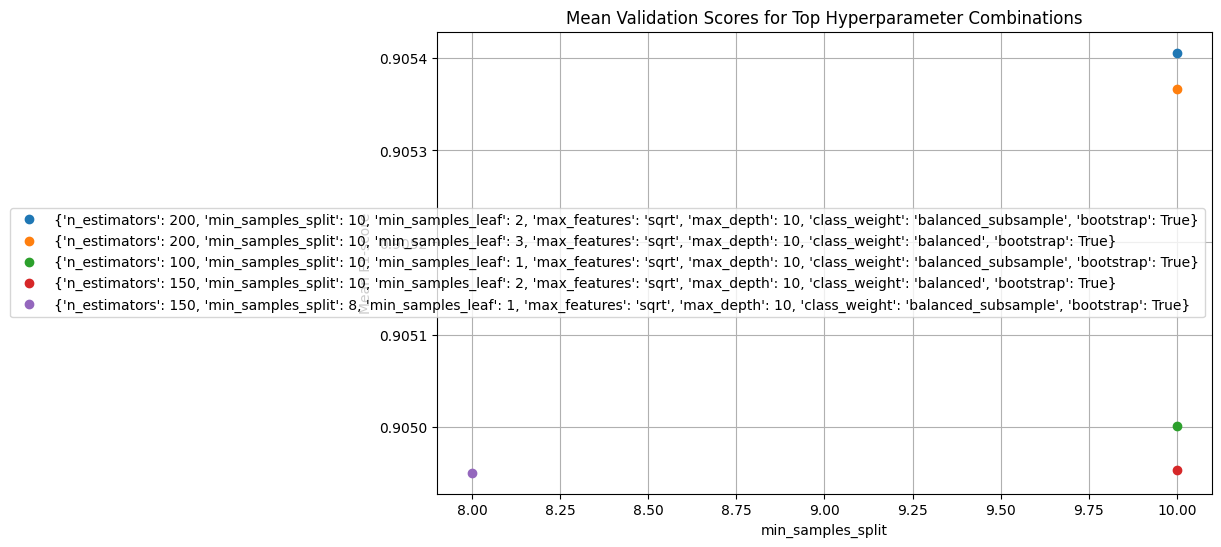

In [35]:
import matplotlib.pyplot as plt

# Set smaller font size for the plot
plt.rcParams.update({'font.size': 10})

means = random_search.cv_results_['mean_test_score']
params = random_search.cv_results_['params']

# Create lists to store the mean validation scores for each hyperparameter combination
mean_scores = []

# Extract mean validation scores for each hyperparameter combination
for mean, param in zip(means, params):
    mean_scores.append((param, mean))

# Sort the mean validation scores based on the mean score
mean_scores.sort(key=lambda x: x[1], reverse=True)

# Plot the mean validation scores for the top N hyperparameter combinations
top_n = 5  # Number of top hyperparameter combinations to plot
plt.figure(figsize=(10, 6))
for i in range(top_n):
    param, mean_score = mean_scores[i]
    plt.plot(param['min_samples_split'], mean_score, 'o', label=str(param))
plt.title('Mean Validation Scores for Top Hyperparameter Combinations')
plt.xlabel('min_samples_split')
plt.ylabel('Mean F1-score')
plt.legend()
plt.grid(True)
plt.show()


### Evaluation metrics of RANDOM FOREST after using cross-validation

In [36]:
valid_pred_acc, valid_pred_pre, valid_pred_recall, valid_pred_f1, train_f1 = get_evaluation_score(best_model,train_X,train_Y,val_X, val_Y)
print("Accuracy of VALID set for prediction: {:.3f}".format(valid_pred_acc))
print("Precision of VALID set for prediction: {:.3f}".format(valid_pred_pre))
print("Recall of VALID set for prediction: {:.3f}".format(valid_pred_recall))

print("F1 score of VALID set for prediction: {:.3f}".format(valid_pred_f1), "\n")
print("F1 score of TRAINING set for prediction: {:.3f}".format(train_f1))

Accuracy of VALID set for prediction: 0.943
Precision of VALID set for prediction: 0.805
Recall of VALID set for prediction: 0.891
F1 score of VALID set for prediction: 0.906 

F1 score of TRAINING set for prediction: 0.909


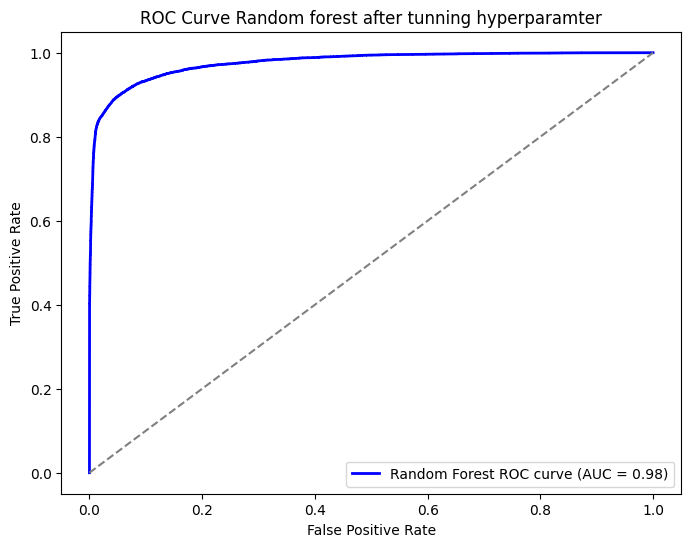

In [38]:
# Get predicted probabilities for positive class
y_probs = best_model.predict_proba(val_X)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(val_Y, y_probs)

# Compute ROC AUC score
roc_auc = roc_auc_score(val_Y, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random forest after tunning hyperparamter')
plt.legend(loc='lower right')
plt.show()